In [1]:
import pandas as pd
import numpy as np
from calendar import monthrange
import matplotlib.pyplot as plt
import datetime

In [2]:
def buyBtc(btcPrice, amount):
    return amount / btcPrice

In [3]:
btcPriceHistory = pd.read_csv("BTC_1h.csv", parse_dates=False)
btcPriceHistory['date'] = pd.to_datetime(btcPriceHistory['date'])

def getBtcPrice(year, month, day):
        startSearch = pd.to_datetime(f'{year}-{month}-{day} 09:00:00')
        endSearch = pd.to_datetime(f'{year}-{month}-{day} 23:00:00')

        filtered = btcPriceHistory[(btcPriceHistory['date'] >= startSearch) &
                                   (btcPriceHistory['date'] <= endSearch)]

        try:
            return filtered.iloc[0]['close']
        except:
            startSearch = pd.to_datetime(
                f'{year}-{month}-{day-1} 00:00:00')
            endSearch = pd.to_datetime(
                f'{year}-{month}-{day} 23:00:00')

            filtered = btcPriceHistory[(btcPriceHistory['date'] >= startSearch) &
                                       (btcPriceHistory['date'] <= endSearch)]
            return filtered.iloc[0]['close']

In [4]:
bitcoinEveryDayAccumulator = 0
bitcoinEveryWeekAccumulator = 0
bitcoinEveryMonthAccumulator = 0

btcEveryDayLine = []
btcEveryWeekLine = []
btcEveryMonthLine = []

monthlyBuy = 200

years = [2018, 2019, 2020, 2021, 2022]
months = range(1, 13)

In [5]:
for year in years:
    if year == 2022:
        months = range(1, 11)
        
    for month in months:
        _, days = monthrange(year, month);
        weeks = days // 7 + (days % 7 > 0)
        firstDayOfMonth = datetime.date(year, month, 1)
        
        dailyBuy = monthlyBuy / days
        weeklyBuy = monthlyBuy / weeks
                
        for day in range(1, days + 1):
            btcPrice = getBtcPrice(year, month, day)
            bitcoinEveryDayAccumulator += buyBtc(btcPrice, dailyBuy)
            
        for week in range(1, weeks + 1):
            firstDayOfWeek = (firstDayOfMonth+ datetime.timedelta(days=week*7)).day
            btcPrice = getBtcPrice(year, month, firstDayOfWeek)
            bitcoinEveryWeekAccumulator += buyBtc(btcPrice, weeklyBuy)
        
        btcPrice = getBtcPrice(year, month, 5)
        bitcoinEveryMonthAccumulator += buyBtc(btcPrice, monthlyBuy)
        btcEveryDayLine.append(bitcoinEveryDayAccumulator)
        btcEveryWeekLine.append(bitcoinEveryWeekAccumulator)
        btcEveryMonthLine.append(bitcoinEveryMonthAccumulator)

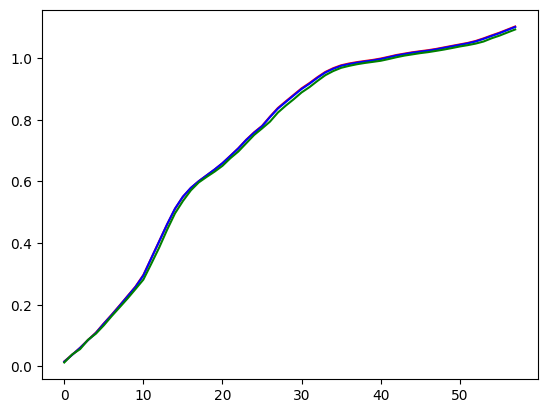

In [6]:
plt.plot(np.array(btcEveryDayLine), c='r')
plt.plot(np.array(btcEveryWeekLine), c='b')
plt.plot(np.array(btcEveryMonthLine),c='g')
plt.show()

In [7]:
print(bitcoinEveryDayAccumulator)
print(bitcoinEveryWeekAccumulator)
print(bitcoinEveryMonthAccumulator)

1.102755876573687
1.1011919989216712
1.0930916722276536


In [8]:
print(f'Difference between month and daily: {round(bitcoinEveryMonthAccumulator - bitcoinEveryDayAccumulator, 8)}',
          f'or {round(((bitcoinEveryMonthAccumulator / bitcoinEveryDayAccumulator)-1)*100)}%')
print(f'Difference between month and weekly: {round(bitcoinEveryMonthAccumulator - bitcoinEveryWeekAccumulator, 8)}',
          f'or {round(((bitcoinEveryMonthAccumulator / bitcoinEveryWeekAccumulator)-1)*100)}%')
print(f'Difference between daily and weekly: {round(bitcoinEveryDayAccumulator - bitcoinEveryWeekAccumulator, 8)}',
          f'or {round(((bitcoinEveryDayAccumulator / bitcoinEveryWeekAccumulator)-1)*100)}%')

Difference between month and daily: -0.0096642 or -1%
Difference between month and weekly: -0.00810033 or -1%
Difference between daily and weekly: 0.00156388 or 0%
